In [1]:
"""
胺分子数据集生成器
生成用于CO2吸收反应能垒预测的胺分子SMILES数据集

包含:
- 伯胺 (Primary amines): R-NH2
- 仲胺 (Secondary amines): R-NH-R'  
- 叔胺 (Tertiary amines): R-N(R'-R'')
- 各种功能化胺类化合物
"""

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
import warnings
warnings.filterwarnings('ignore')

class AmineDatasetGenerator:
    """胺分子数据集生成器"""
    
    def __init__(self):
        self.primary_amines = []
        self.secondary_amines = []
        self.tertiary_amines = []
        
    def generate_primary_amines(self):
        """生成伯胺化合物"""
        # 常见的伯胺
        primary_amines = [
            # 简单脂肪族伯胺
            'CN',  # 甲胺
            'CCN',  # 乙胺
            'CCCN',  # 丙胺
            'CCCCN',  # 丁胺
            'CCCCCN',  # 戊胺
            'CCCCCCN',  # 己胺
            'CCCCCCCN',  # 庚胺
            'CCCCCCCCN',  # 辛胺
            
            # 支链伯胺
            'CC(C)N',  # 异丙胺
            'CCC(C)N',  # 2-丁胺
            'CC(C)CN',  # 异丁胺
            'CC(C)(C)CN',  # 新戊胺
            
            # 环状伯胺
            'C1CCNCC1',  # 哌嗪-4-胺
            'NC1CCCC1',  # 环戊胺
            'NC1CCCCC1',  # 环己胺
            
            # 功能化伯胺
            'NCCCO',  # 3-氨基-1-丙醇
            'NCCO',  # 乙醇胺 (MEA)
            'NCCN',  # 乙二胺 (EDA)
            'NCCCN',  # 1,3-丙二胺
            'NCCCCN',  # 1,4-丁二胺
            'NCCCCCN',  # 1,5-戊二胺
            'NCCCCCCN',  # 1,6-己二胺
            
            # 氨基酸相关
            'NCC(=O)O',  # 甘氨酸
            'NC(C)C(=O)O',  # 丙氨酸
            'NC(CO)C(=O)O',  # 丝氨酸
            
            # 芳香族伯胺
            'Nc1ccccc1',  # 苯胺
            'Nc1ccc(C)cc1',  # 对甲苯胺
            'Nc1ccc(O)cc1',  # 对氨基苯酚
            'Nc1ccc(N)cc1',  # 对苯二胺
            
            # 杂环胺
            'Nc1ccccn1',  # 2-氨基吡啶
            'Nc1cccnc1',  # 3-氨基吡啶
            'Nc1ccncc1',  # 4-氨基吡啶
        ]
        
        return primary_amines
    
    def generate_secondary_amines(self):
        """生成仲胺化合物"""
        secondary_amines = [
            # 简单脂肪族仲胺
            'CNC',  # 二甲胺
            'CCNCC',  # 二乙胺
            'CCCNCCC',  # 二丙胺
            'CCCCNCCCC',  # 二丁胺
            
            # 不对称仲胺
            'CNCC',  # N-甲基乙胺
            'CNCCC',  # N-甲基丙胺
            'CCNCCC',  # N-乙基丙胺
            'CNCCCC',  # N-甲基丁胺
            
            # 环状仲胺
            'C1CCNCC1',  # 哌啶
            'C1CNCCC1',  # 吡咯烷
            'C1CNCCCC1',  # 六氢氮杂卓
            
            # 功能化仲胺
            'CNCCCO',  # N-甲基-3-氨基-1-丙醇
            'CCNCCCO',  # N-乙基-3-氨基-1-丙醇
            'OCCNCCO',  # 二乙醇胺 (DEA)
            'CNCCN',  # N-甲基乙二胺
            'CCNCCN',  # N-乙基乙二胺
            
            # 哌嗪衍生物
            'CN1CCNCC1',  # N-甲基哌嗪
            'CCN1CCNCC1',  # N-乙基哌嗪
            'C1CN(CCO)CCN1',  # N-(2-羟乙基)哌嗪
            
            # 芳香族仲胺
            'CNc1ccccc1',  # N-甲基苯胺
            'CCNc1ccccc1',  # N-乙基苯胺
            'c1ccc(Nc2ccccc2)cc1',  # 二苯胺
            
            # 杂环仲胺
            'CN1CCCC1',  # N-甲基吡咯烷
            'CCN1CCCC1',  # N-乙基吡咯烷
            'CN1CCCCC1',  # N-甲基哌啶
        ]
        
        return secondary_amines
    
    def generate_tertiary_amines(self):
        """生成叔胺化合物"""
        tertiary_amines = [
            # 简单脂肪族叔胺
            'CN(C)C',  # 三甲胺
            'CCN(CC)CC',  # 三乙胺
            'CCCN(CCC)CCC',  # 三丙胺
            'CCCCN(CCCC)CCCC',  # 三丁胺
            
            # 不对称叔胺
            'CN(C)CC',  # N,N-二甲基乙胺
            'CCN(C)C',  # N,N-二甲基乙胺
            'CN(CC)CCC',  # N-甲基-N-乙基丙胺
            'CCN(CCC)CCCC',  # N-乙基-N-丙基丁胺
            
            # 功能化叔胺
            'CN(C)CCO',  # N,N-二甲基乙醇胺
            'CCN(CC)CCO',  # N,N-二乙基乙醇胺
            'OCCN(CCO)CCO',  # 三乙醇胺 (TEA)
            'CN(C)CCCO',  # 3-(二甲基氨基)-1-丙醇
            'CCN(CC)CCCO',  # 3-(二乙基氨基)-1-丙醇
            
            # 环状叔胺
            'CN1CCCCC1',  # N-甲基哌啶
            'CCN1CCCCC1',  # N-乙基哌啶
            'CN1CCCC1',  # N-甲基吡咯烷
            'CCN1CCCC1',  # N-乙基吡咯烷
            
            # 双环和多环叔胺
            'CN1CCN(C)CC1',  # N,N'-二甲基哌嗪
            'CCN1CCN(CC)CC1',  # N,N'-二乙基哌嗪
            'C1CN2CCN1CC2',  # 1,4-二氮杂双环[2.2.2]辛烷 (DABCO)
            
            # 芳香族叔胺
            'CN(C)c1ccccc1',  # N,N-二甲基苯胺
            'CCN(CC)c1ccccc1',  # N,N-二乙基苯胺
            'CN(C)c1ccc(C)cc1',  # N,N-二甲基-4-甲基苯胺
            
            # 季铵化合物前体
            'C[N+](C)(C)CCO',  # 胆碱型化合物
            'CCN(CC)CC[N+](C)(C)C',  # 双功能叔胺
            
            # 杂环叔胺
            'Cn1ccnc1',  # N-甲基咪唑
            'CCn1ccnc1',  # N-乙基咪唑
            'CN1C=CN=C1',  # N-甲基咪唑（异构体）
        ]
        
        return tertiary_amines
    
    def generate_specialized_co2_capture_amines(self):
        """生成专门用于CO2捕获的胺类化合物"""
        specialized_amines = [
            # 常用CO2吸收剂
            'NCCO',  # 单乙醇胺 (MEA)
            'OCCNCCO',  # 二乙醇胺 (DEA)
            'OCCN(CCO)CCO',  # 三乙醇胺 (TEA)
            'CC(O)CN',  # 1-氨基-2-丙醇 (MIPA)
            'NCCCCO',  # 4-氨基-1-丁醇 (AMP)
            'CN(CCO)CCO',  # N-甲基二乙醇胺 (MDEA)
            
            # 立体阻碍胺
            'CC(C)(N)CCO',  # 2-氨基-2-甲基-1-丙醇 (AMP)
            'CC(C)(CN)C(C)(C)N',  # 2,2'-二氨基二异丙胺
            
            # 环状胺CO2吸收剂
            'C1CCN(CCO)CC1',  # 4-(2-羟乙基)哌啶
            'C1CN(CCO)CCN1',  # 1-(2-羟乙基)哌嗪
            'OCC1CCCCN1',  # 2-哌啶甲醇
            
            # 双功能胺
            'NCCCN',  # 1,3-丙二胺
            'NCCCCN',  # 1,4-丁二胺
            'NCCOCCN',  # 双(2-氨乙基)醚
            'NCCOCCOCCOCN',  # 聚乙二醇双胺
            
            # 氨基酸盐相关
            'NCC(=O)[O-]',  # 甘氨酸阴离子
            'NC(C)C(=O)[O-]',  # 丙氨酸阴离子
            'NC(CCC(=O)[O-])C(=O)[O-]',  # 谷氨酸阴离子
            
            # 咪唑基化合物
            'c1c[nH]cn1',  # 咪唑
            'Cc1c[nH]cn1',  # 4-甲基咪唑
            'c1cn(CCO)cn1',  # 1-(2-羟乙基)咪唑
            
            # 胍基化合物
            'NC(=N)N',  # 胍
            'CNC(=N)N',  # 1-甲基胍
            'NC(=N)NCC(=O)O',  # 胍基乙酸
        ]
        
        return specialized_amines
    
    def validate_smiles(self, smiles_list):
        """验证SMILES有效性"""
        valid_smiles = []
        invalid_count = 0
        
        for smiles in smiles_list:
            try:
                mol = Chem.MolFromSmiles(smiles)
                if mol is not None:
                    # 计算一些基本属性确保分子合理
                    mw = Descriptors.MolWt(mol)
                    if 10 < mw < 500:  # 分子量在合理范围内
                        valid_smiles.append(smiles)
                    else:
                        invalid_count += 1
                else:
                    invalid_count += 1
            except:
                invalid_count += 1
                
        print(f"验证完成: {len(valid_smiles)} 个有效SMILES, {invalid_count} 个无效")
        return valid_smiles
    
    def classify_amine_type(self, smiles):
        """分类胺的类型"""
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                return 'unknown'
            
            # 查找氮原子
            nitrogen_atoms = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() == 7]
            
            if not nitrogen_atoms:
                return 'no_nitrogen'
            
            # 分析氮原子的连接情况
            for n_atom in nitrogen_atoms:
                # 获取与氮相连的非氢原子数
                heavy_neighbors = len([neighbor for neighbor in n_atom.GetNeighbors() 
                                     if neighbor.GetAtomicNum() != 1])
                
                # 伯胺：氮连接1个非氢原子
                if heavy_neighbors == 1:
                    return 'primary'
                # 仲胺：氮连接2个非氢原子
                elif heavy_neighbors == 2:
                    return 'secondary'
                # 叔胺：氮连接3个非氢原子
                elif heavy_neighbors == 3:
                    return 'tertiary'
                    
            return 'other'
            
        except:
            return 'unknown'
    
    def generate_complete_dataset(self):
        """生成完整的胺分子数据集"""
        print("正在生成胺分子数据集...")
        
        # 收集所有胺类化合物
        all_amines = []
        
        # 生成各类胺
        primary = self.generate_primary_amines()
        secondary = self.generate_secondary_amines()
        tertiary = self.generate_tertiary_amines()
        specialized = self.generate_specialized_co2_capture_amines()
        
        all_amines.extend(primary)
        all_amines.extend(secondary)
        all_amines.extend(tertiary)
        all_amines.extend(specialized)
        
        # 去重
        unique_amines = list(set(all_amines))
        print(f"去重前: {len(all_amines)} 个分子")
        print(f"去重后: {len(unique_amines)} 个分子")
        
        # 验证SMILES
        valid_amines = self.validate_smiles(unique_amines)
        
        # 创建DataFrame
        data = []
        for i, smiles in enumerate(valid_amines):
            amine_type = self.classify_amine_type(smiles)
            data.append({
                'molecule_id': f'amine_{i+1:03d}',
                'smiles': smiles,
                'amine_type': amine_type,
                'description': self._get_molecule_description(smiles)
            })
            
        df = pd.DataFrame(data)
        
        # 检查类别分布并补充样本
        type_counts = df['amine_type'].value_counts()
        print("\n初始胺类型分布:")
        for amine_type, count in type_counts.items():
            print(f"  {amine_type}: {count} 个")
        
        # 为样本数过少的类别补充样本
        min_samples_needed = 5  # 每个类别至少5个样本
        supplemented_data = []
        
        for amine_type in type_counts.index:
            if type_counts[amine_type] < min_samples_needed:
                print(f"\n⚠️  {amine_type} 类别样本不足（{type_counts[amine_type]}个），正在补充...")
                
                # 基于现有分子生成变体
                existing_molecules = df[df['amine_type'] == amine_type]['smiles'].tolist()
                needed = min_samples_needed - type_counts[amine_type]
                
                # 简单的分子变体生成（通过添加甲基等小的修饰）
                variations = self._generate_molecular_variations(existing_molecules, needed)
                
                for j, var_smiles in enumerate(variations):
                    if self.validate_smiles([var_smiles]):  # 验证变体有效性
                        supplemented_data.append({
                            'molecule_id': f'{amine_type}_var_{j+1:02d}',
                            'smiles': var_smiles,
                            'amine_type': amine_type,
                            'description': f'{amine_type}变体分子'
                        })
        
        # 合并补充的数据
        if supplemented_data:
            supp_df = pd.DataFrame(supplemented_data)
            df = pd.concat([df, supp_df], ignore_index=True)
            print(f"补充了 {len(supplemented_data)} 个变体分子")
        
        # 最终统计信息
        final_counts = df['amine_type'].value_counts()
        print("\n最终胺类型分布:")
        for amine_type, count in final_counts.items():
            print(f"  {amine_type}: {count} 个")
        print(f"\n总分子数: {len(df)}")
        
        return df
    
    def _generate_molecular_variations(self, base_molecules, needed_count):
        """生成分子变体"""
        variations = []
        modification_patterns = [
            ('C', 'CC'),  # 甲基化
            ('N', 'N(C)'),  # N-甲基化
            ('O', 'OC'),  # 乙基化羟基
        ]
        
        for base_smiles in base_molecules:
            if len(variations) >= needed_count:
                break
                
            for old, new in modification_patterns:
                if len(variations) >= needed_count:
                    break
                    
                # 简单的字符串替换（实际应用中可能需要更复杂的化学修饰）
                if old in base_smiles and base_smiles.count(old) == 1:
                    modified = base_smiles.replace(old, new, 1)
                    if modified != base_smiles and modified not in base_molecules:
                        variations.append(modified)
        
        return variations[:needed_count]
    
    def _get_molecule_description(self, smiles):
        """获取分子描述"""
        descriptions = {
            'CN': '甲胺',
            'CCN': '乙胺',
            'NCCO': '单乙醇胺(MEA)',
            'OCCNCCO': '二乙醇胺(DEA)',
            'OCCN(CCO)CCO': '三乙醇胺(TEA)',
            'CN(CCO)CCO': 'N-甲基二乙醇胺(MDEA)',
            'CN(C)C': '三甲胺',
            'CCN(CC)CC': '三乙胺',
            'c1c[nH]cn1': '咪唑',
            'NCCCN': '1,3-丙二胺',
            'NC1CCCCC1': '环己胺'
        }
        
        return descriptions.get(smiles, f'胺类化合物({smiles})')


def main():
    """主函数"""
    print("="*60)
    print("胺分子数据集生成器")
    print("用于CO2吸收反应能垒预测")
    print("="*60)
    
    # 创建生成器
    generator = AmineDatasetGenerator()
    
    # 生成数据集
    dataset = generator.generate_complete_dataset()
    
    # 保存为CSV
    output_file = 'input_molecules.csv'
    dataset.to_csv(output_file, index=False, encoding='utf-8')
    
    print(f"\n✅ 数据集已保存为: {output_file}")
    print(f"📊 包含 {len(dataset)} 个胺分子")
    
    # 显示样例数据
    print("\n📋 数据样例:")
    print(dataset.head(10).to_string(index=False))
    
    # 另外生成CO2分子数据
    co2_data = pd.DataFrame({
        'molecule_id': ['CO2_001'],
        'smiles': ['O=C=O'],
        'amine_type': ['reactant'],
        'description': ['二氧化碳']
    })
    
    # 合并数据集包含CO2
    complete_dataset = pd.concat([dataset, co2_data], ignore_index=True)
    complete_output = 'input_molecules_with_co2.csv'
    complete_dataset.to_csv(complete_output, index=False, encoding='utf-8')
    
    print(f"\n✅ 包含CO2的完整数据集已保存为: {complete_output}")
    print("\n🎯 数据集已准备完成，可用于后续的反应能垒预测!")


if __name__ == "__main__":
    main() 

胺分子数据集生成器
用于CO2吸收反应能垒预测
正在生成胺分子数据集...
去重前: 109 个分子
去重后: 99 个分子
验证完成: 99 个有效SMILES, 0 个无效

初始胺类型分布:
  primary: 42 个
  tertiary: 33 个
  secondary: 23 个
  other: 1 个

⚠️  other 类别样本不足（1个），正在补充...
验证完成: 0 个有效SMILES, 1 个无效
验证完成: 1 个有效SMILES, 0 个无效
补充了 1 个变体分子

最终胺类型分布:
  primary: 42 个
  tertiary: 33 个
  secondary: 23 个
  other: 2 个

总分子数: 100

✅ 数据集已保存为: input_molecules.csv
📊 包含 100 个胺分子

📋 数据样例:
molecule_id                   smiles amine_type                     description
  amine_001                 C1CCNCC1  secondary                 胺类化合物(C1CCNCC1)
  amine_002                 NCC(=O)O    primary                 胺类化合物(NCC(=O)O)
  amine_003                  CC(O)CN    primary                  胺类化合物(CC(O)CN)
  amine_004                  CN(C)CC   tertiary                  胺类化合物(CN(C)CC)
  amine_005 NC(CCC(=O)[O-])C(=O)[O-]    primary 胺类化合物(NC(CCC(=O)[O-])C(=O)[O-])
  amine_006               CCN(CC)CCO   tertiary               胺类化合物(CCN(CC)CCO)
  amine_007                 Cn1ccnc1   tertia

[22:48:01] SMILES Parse Error: syntax error while parsing: C[N(C)+](C)(C)CCO
[22:48:01] SMILES Parse Error: Failed parsing SMILES 'C[N(C)+](C)(C)CCO' for input: 'C[N(C)+](C)(C)CCO'


RDKit版本: 2024.03.5
发现输入文件，开始完整工作流程...
胺-CO2反应能垒预测系统 - 完整工作流程
区分伯胺/仲胺与叔胺的不同反应机理

步骤1: 载入分子数据
正在载入分子文件: input_molecules.csv
成功载入了 100 个分子

步骤2: 计算分子描述符
正在计算分子描述符...
正在处理分子 1/100
正在处理分子 21/100
正在处理分子 41/100
正在处理分子 61/100
正在处理分子 81/100
成功计算了 29 个描述符

胺分子类型分布:
  primary: 42 个
  tertiary: 33 个
  secondary: 23 个
  other: 2 个

步骤3: 生成胺-CO2反应对
正在生成胺-CO2反应对，最大对数: 800
警告: 未找到CO2分子，将使用默认CO2性质
实际生成 100 个反应对
正在处理反应对 1/100
正在处理反应对 51/100

步骤4: 分割训练和测试集
正在分割数据集，测试集比例: 0.2

胺类型分布:
  primary: 42 个样本
  tertiary: 33 个样本
  secondary: 23 个样本
  other: 2 个样本

✅ 所有胺类型样本数充足（最少: 2），将使用分层采样

训练集大小: 80, 测试集大小: 20

分割后的胺类型分布:
训练集:
  primary: 34 个
  tertiary: 26 个
  secondary: 18 个
  other: 2 个
测试集:
  primary: 8 个
  tertiary: 7 个
  secondary: 5 个

步骤5: 训练预测模型
正在训练xgboost模型...
正在进行超参数优化...
最佳参数: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
最佳交叉验证R²: 0.9777
训练集R²: 0.9998
训练集RMSE: 0.1763 kcal/mol

步骤6: 评估模型性能
正在评估模型性能...
测试集R²: 0.9539
测试集RMSE: 2.7730 kcal/mol
测

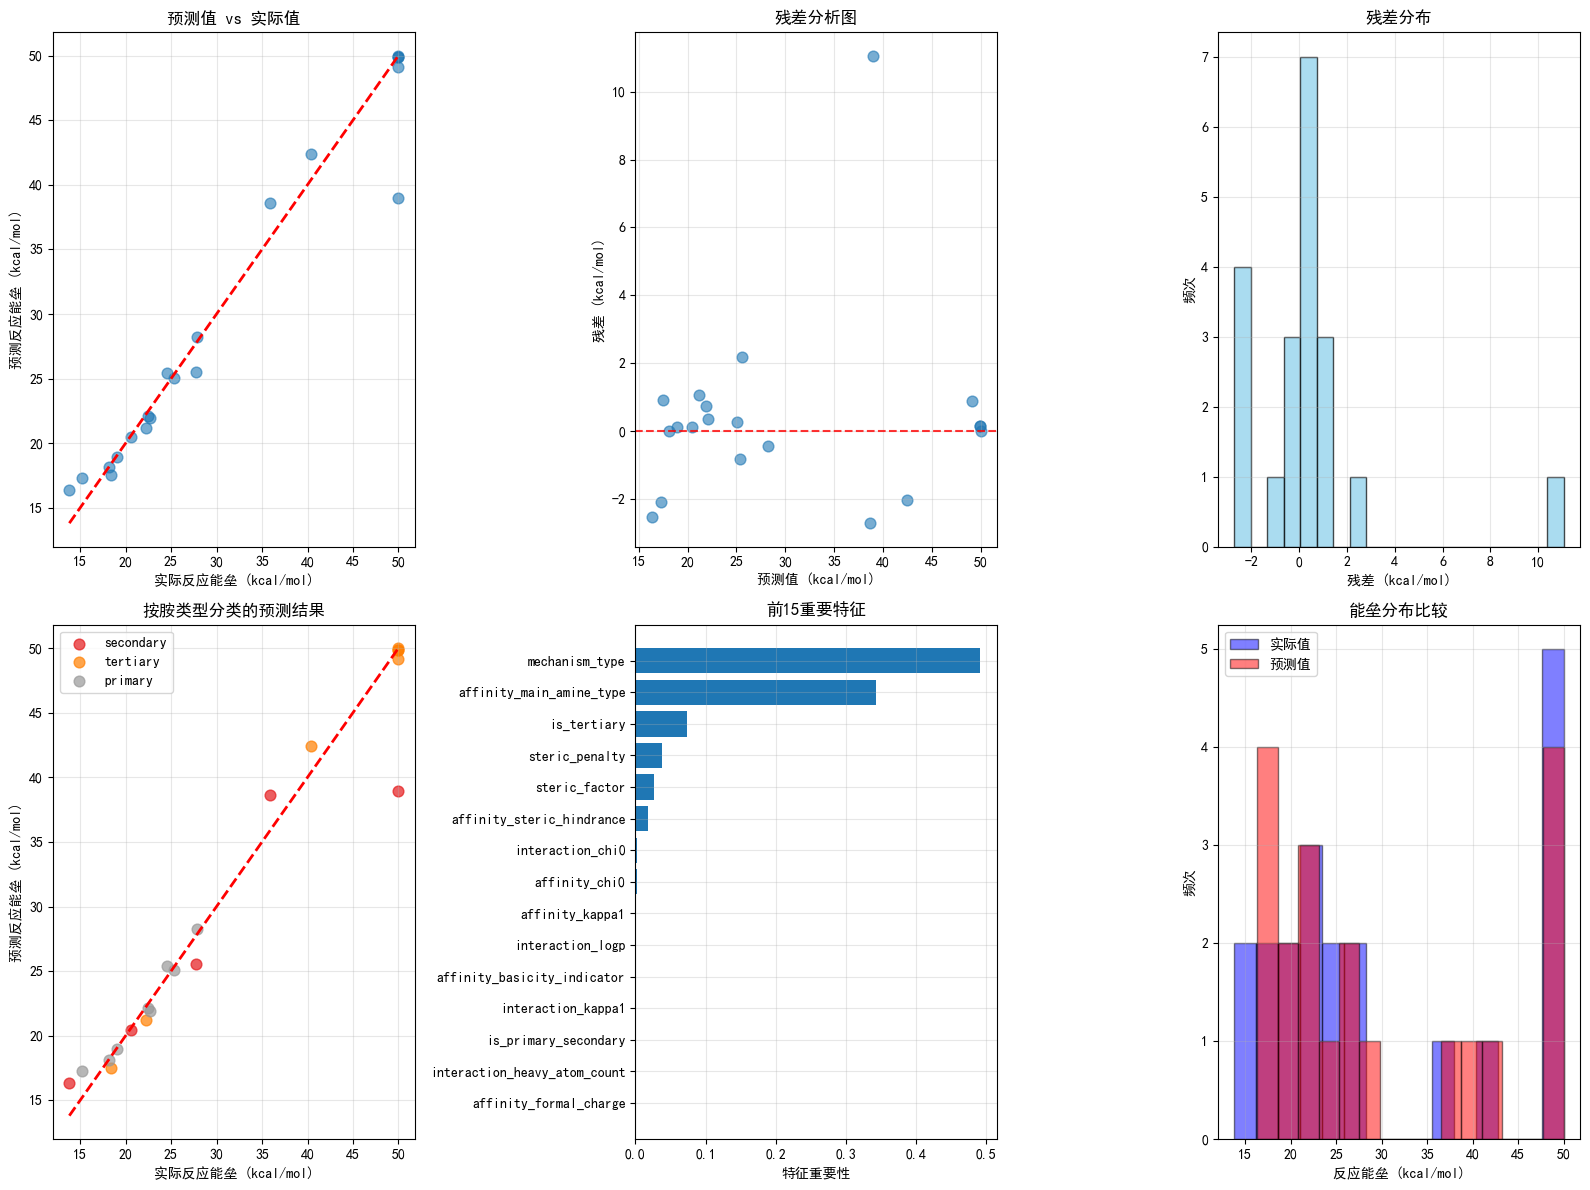


步骤7: 保存模型
模型已保存到: ./amine_co2_barrier_results\amine_co2_barrier_predictor_xgboost.pkl

🎉 胺-CO2反应能垒预测工作流程完成!
📊 最终测试集R²: 0.9539
📊 最终测试集RMSE: 2.7730 kcal/mol
📁 结果保存在: ./amine_co2_barrier_results

🔬 示例反应能垒预测:
单乙醇胺(MEA): 21.52 kcal/mol
二乙醇胺(DEA): 25.54 kcal/mol
N-甲基二乙醇胺(MDEA): 50.00 kcal/mol
三甲胺: 39.94 kcal/mol
咪唑: 18.17 kcal/mol


In [2]:
"""
胺-CO2反应能垒预测系统
专门用于预测胺分子与CO2的吸收反应能垒

特点:
- 区分伯胺/仲胺与叔胺的不同反应机理
- 基于RDKit计算丰富的分子描述符
- 超参数优化和模型保存
- 中文可视化支持
- 高精度能垒预测
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import itertools
import pickle
import os
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans', 'WenQuanYi Micro Hei']
plt.rcParams['axes.unicode_minus'] = False

# 尝试导入高级库
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost未安装，将使用其他模型")

try:
    from lightgbm import LGBMRegressor
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("LightGBM未安装，将使用其他模型")

# RDKit分子描述符
try:
    from rdkit import Chem
    from rdkit.Chem import Descriptors, rdMolDescriptors, Crippen, Lipinski
    from rdkit.Chem.rdMolDescriptors import CalcMolFormula
    from rdkit import __version__ as rdkit_version
    RDKIT_AVAILABLE = True
    print(f"RDKit版本: {rdkit_version}")
except ImportError:
    print("警告: RDKit未安装，将使用简化的分子描述符")
    RDKIT_AVAILABLE = False


class AmineDescriptorCalculator:
    """胺分子描述符计算器"""
    
    def __init__(self):
        self.co2_smiles = 'O=C=O'
        self.scaler = StandardScaler()
        
    def calculate_amine_descriptors(self, smiles):
        """计算胺分子的详细描述符"""
        if not RDKIT_AVAILABLE:
            return self._calculate_basic_descriptors(smiles)
            
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return {}
            
        descriptors = {}
        
        try:
            # 基础物理化学性质
            descriptors['molecular_weight'] = Descriptors.MolWt(mol)
            descriptors['logp'] = Descriptors.MolLogP(mol)
            descriptors['polar_surface_area'] = Descriptors.TPSA(mol)
            descriptors['heavy_atom_count'] = Descriptors.HeavyAtomCount(mol)
            descriptors['formal_charge'] = Chem.rdmolops.GetFormalCharge(mol)
            
            # 氢键性质
            descriptors['hbd_count'] = Descriptors.NumHDonors(mol)
            descriptors['hba_count'] = Descriptors.NumHAcceptors(mol)
            
            # 胺特异性描述符
            descriptors.update(self._calculate_amine_specific_descriptors(mol))
            
            # 结构复杂性
            descriptors['rotatable_bonds'] = Descriptors.NumRotatableBonds(mol)
            descriptors['aromatic_rings'] = Descriptors.NumAromaticRings(mol)
            descriptors['saturated_rings'] = Descriptors.NumSaturatedRings(mol)
            descriptors['ring_count'] = mol.GetRingInfo().NumRings()
            
            # 连接性和形状
            descriptors['chi0'] = Descriptors.Chi0(mol)
            descriptors['chi1'] = Descriptors.Chi1(mol)
            descriptors['kappa1'] = Descriptors.Kappa1(mol)
            descriptors['kappa2'] = Descriptors.Kappa2(mol)
            
            # 电子性质
            descriptors['bertz_complexity'] = Descriptors.BertzCT(mol)
            descriptors['balaban_j'] = Descriptors.BalabanJ(mol)
            
            # 立体阻碍相关 - 修复FractionCsp3兼容性问题
            try:
                # 尝试多种可能的FractionCsp3函数名
                if hasattr(Descriptors, 'FractionCsp3'):
                    descriptors['fraction_csp3'] = Descriptors.FractionCsp3(mol)
                elif hasattr(rdMolDescriptors, 'CalcFractionCsp3'):
                    descriptors['fraction_csp3'] = rdMolDescriptors.CalcFractionCsp3(mol)
                elif hasattr(Descriptors, 'CalcFractionCSP3'):
                    descriptors['fraction_csp3'] = Descriptors.CalcFractionCSP3(mol)
                else:
                    # 如果都不存在，使用自定义计算
                    descriptors['fraction_csp3'] = self._calculate_fraction_csp3_alternative(mol)
            except Exception as e:
                print(f"⚠️  计算FractionCsp3时出错: {e}")
                descriptors['fraction_csp3'] = self._calculate_fraction_csp3_alternative(mol)
            
            descriptors['num_heavy_atoms'] = descriptors['heavy_atom_count']
            
            # CO2反应相关描述符
            descriptors.update(self._calculate_co2_reaction_descriptors(mol))
            
        except Exception as e:
            print(f"计算描述符时出错 (SMILES: {smiles}): {e}")
            
        return descriptors
    
    def _calculate_fraction_csp3_alternative(self, mol):
        """计算sp3碳比例的替代方法（版本兼容）"""
        try:
            carbon_atoms = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() == 6]
            if not carbon_atoms:
                return 0.0
            
            # 计算sp3碳原子数量
            sp3_count = 0
            for atom in carbon_atoms:
                # sp3碳原子的特征：
                # 1. 不是芳香族
                # 2. 杂化方式为sp3（度数为4且无双键三键）
                if not atom.GetIsAromatic():
                    # 检查原子的邻居和键类型
                    neighbors = atom.GetNeighbors()
                    single_bonds = sum(1 for bond in atom.GetBonds() if bond.GetBondType() == Chem.BondType.SINGLE)
                    total_bonds = len(atom.GetBonds())
                    
                    # 如果所有键都是单键且原子度数为4，或者总键数等于单键数（表示无双键三键）
                    if single_bonds == total_bonds and atom.GetDegree() == 4:
                        sp3_count += 1
                    elif single_bonds == total_bonds and atom.GetDegree() < 4:
                        # 考虑隐式氢原子
                        implicit_h = atom.GetTotalNumHs()
                        if atom.GetDegree() + implicit_h == 4:
                            sp3_count += 1
            
            return sp3_count / len(carbon_atoms)
            
        except Exception as e:
            print(f"⚠️  替代计算FractionCsp3时出错: {e}")
            return 0.0
    
    def _calculate_amine_specific_descriptors(self, mol):
        """计算胺特异性描述符"""
        descriptors = {}
        
        # 查找氮原子
        nitrogen_atoms = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() == 7]
        
        if nitrogen_atoms:
            # 氮原子数量
            descriptors['nitrogen_count'] = len(nitrogen_atoms)
            
            # 胺类型分析
            primary_count = 0
            secondary_count = 0
            tertiary_count = 0
            
            for n_atom in nitrogen_atoms:
                heavy_neighbors = len([neighbor for neighbor in n_atom.GetNeighbors() 
                                     if neighbor.GetAtomicNum() != 1])
                
                if heavy_neighbors == 1:
                    primary_count += 1
                elif heavy_neighbors == 2:
                    secondary_count += 1
                elif heavy_neighbors == 3:
                    tertiary_count += 1
            
            descriptors['primary_amine_count'] = primary_count
            descriptors['secondary_amine_count'] = secondary_count
            descriptors['tertiary_amine_count'] = tertiary_count
            
            # 主要胺类型（用于机理区分）
            if primary_count > 0:
                descriptors['main_amine_type'] = 1  # 伯胺
            elif secondary_count > 0:
                descriptors['main_amine_type'] = 2  # 仲胺
            elif tertiary_count > 0:
                descriptors['main_amine_type'] = 3  # 叔胺
            else:
                descriptors['main_amine_type'] = 0  # 其他
                
            # 碱性强度相关
            # 伯胺和仲胺通常比叔胺碱性更强
            if primary_count > 0 or secondary_count > 0:
                descriptors['basicity_indicator'] = 1
            else:
                descriptors['basicity_indicator'] = 0
                
            # 立体阻碍指数
            total_carbons = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 6)
            descriptors['steric_hindrance'] = total_carbons / max(len(nitrogen_atoms), 1)
            
        else:
            # 没有氮原子的情况
            descriptors.update({
                'nitrogen_count': 0,
                'primary_amine_count': 0,
                'secondary_amine_count': 0,
                'tertiary_amine_count': 0,
                'main_amine_type': 0,
                'basicity_indicator': 0,
                'steric_hindrance': 0
            })
        
        return descriptors
    
    def _calculate_co2_reaction_descriptors(self, mol):
        """计算与CO2反应相关的描述符"""
        descriptors = {}
        
        # 亲核性指标（氮原子的电子云密度）
        nitrogen_atoms = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() == 7]
        
        if nitrogen_atoms:
            # 计算氮原子周围的电子环境
            electron_density_sum = 0
            for n_atom in nitrogen_atoms:
                # 简化的电子密度计算
                neighbors = n_atom.GetNeighbors()
                electron_contribution = 0
                
                for neighbor in neighbors:
                    if neighbor.GetAtomicNum() == 6:  # 碳
                        electron_contribution += 0.1
                    elif neighbor.GetAtomicNum() == 8:  # 氧
                        electron_contribution -= 0.2  # 氧的吸电子效应
                    elif neighbor.GetAtomicNum() == 1:  # 氢
                        electron_contribution += 0.05
                        
                electron_density_sum += electron_contribution
                
            descriptors['nucleophilicity_index'] = electron_density_sum
            
            # 反应位点可及性
            # 计算氮原子周围的立体阻碍
            steric_sum = 0
            for n_atom in nitrogen_atoms:
                local_steric = 0
                for neighbor in n_atom.GetNeighbors():
                    if neighbor.GetAtomicNum() == 6:
                        # 计算碳原子的取代度
                        carbon_degree = len([n for n in neighbor.GetNeighbors() 
                                           if n.GetAtomicNum() != 1])
                        local_steric += carbon_degree
                steric_sum += local_steric
                
            descriptors['reaction_site_accessibility'] = 1.0 / (1.0 + steric_sum)
            
        else:
            descriptors['nucleophilicity_index'] = 0
            descriptors['reaction_site_accessibility'] = 0
            
        # 分子极性对CO2溶解的影响
        descriptors['polarity_co2_affinity'] = descriptors.get('polar_surface_area', 0) / max(descriptors.get('molecular_weight', 1), 1)
        
        return descriptors
    
    def _calculate_basic_descriptors(self, smiles):
        """基础描述符计算（RDKit不可用时）"""
        descriptors = {
            'molecular_weight': len(smiles) * 12,
            'logp': smiles.count('C') * 0.5 - smiles.count('N') * 0.3 - smiles.count('O') * 0.5,
            'polar_surface_area': smiles.count('N') * 15 + smiles.count('O') * 20,
            'heavy_atom_count': len([c for c in smiles if c.isupper()]),
            'nitrogen_count': smiles.count('N'),
            'main_amine_type': 1 if 'N' in smiles else 0,
        }
        return descriptors

    def _calculate_fraction_csp3_alternative(self, mol):
        """计算sp3碳比例的替代方法"""
        try:
            carbon_atoms = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() == 6]
            if not carbon_atoms:
                return 0.0
            
            sp3_count = 0
            for atom in carbon_atoms:
                if not atom.GetIsAromatic():
                    # 检查是否为sp3杂化
                    neighbors = atom.GetNeighbors()
                    bonds = atom.GetBonds()
                    
                    # 计算单键数
                    single_bonds = sum(1 for bond in bonds if bond.GetBondType() == Chem.BondType.SINGLE)
                    total_bonds = len(bonds)
                    
                    # sp3碳：所有键都是单键且总配位数为4
                    if single_bonds == total_bonds:
                        total_degree = atom.GetDegree() + atom.GetTotalNumHs()
                        if total_degree == 4:
                            sp3_count += 1
            
            return sp3_count / len(carbon_atoms)
            
        except Exception as e:
            print(f"⚠️  替代FractionCsp3计算失败: {e}")
            return 0.0


class AmineReactionEnergyCalculator:
    """胺-CO2反应能垒计算器"""
    
    def __init__(self):
        # 基于文献的反应能垒参数
        self.barrier_params = {
            # 伯胺和仲胺的反应机理参数
            'primary_secondary': {
                'base_barrier': 15.0,  # kcal/mol 基础活化能
                'nucleophilicity_factor': -2.0,  # 亲核性贡献
                'steric_penalty': 3.0,  # 立体阻碍惩罚
                'electronic_factor': -1.5,  # 电子效应
                'solvation_bonus': -2.5,  # 溶剂化效应
            },
            # 叔胺的反应机理参数
            'tertiary': {
                'base_barrier': 25.0,  # kcal/mol 更高的基础活化能
                'nucleophilicity_factor': -1.5,  # 较弱的亲核性
                'steric_penalty': 5.0,  # 更大的立体阻碍
                'electronic_factor': -1.0,  # 不同的电子效应
                'solvation_bonus': -3.0,  # 可能更好的溶剂化
            }
        }
        
    def calculate_reaction_barrier(self, amine_props):
        """计算胺-CO2反应能垒"""
        # 确定反应机理类型
        main_amine_type = amine_props.get('main_amine_type', 0)
        
        if main_amine_type in [1, 2]:  # 伯胺或仲胺
            params = self.barrier_params['primary_secondary']
        elif main_amine_type == 3:  # 叔胺
            params = self.barrier_params['tertiary']
        else:
            # 默认使用伯仲胺参数
            params = self.barrier_params['primary_secondary']
        
        # 计算能垒
        barrier = params['base_barrier']
        
        # 亲核性贡献
        nucleophilicity = amine_props.get('nucleophilicity_index', 0)
        barrier += nucleophilicity * params['nucleophilicity_factor']
        
        # 立体阻碍
        steric_hindrance = amine_props.get('steric_hindrance', 0)
        barrier += steric_hindrance * params['steric_penalty']
        
        # 电子效应
        electron_effect = amine_props.get('basicity_indicator', 0)
        barrier += electron_effect * params['electronic_factor']
        
        # 溶剂化效应
        polarity = amine_props.get('polarity_co2_affinity', 0)
        barrier += min(polarity * 10, 1.0) * params['solvation_bonus']
        
        # 分子大小效应
        mw_factor = amine_props.get('molecular_weight', 100) / 100.0
        barrier += (mw_factor - 1.0) * 2.0
        
        # 添加一些随机性模拟实验误差
        noise = np.random.normal(0, 1.0)
        barrier += noise
        
        # 确保能垒在合理范围内
        barrier = max(5.0, min(barrier, 50.0))
        
        return barrier


class AmineBarrierFeatureGenerator:
    """胺-CO2反应特征生成器"""
    
    def __init__(self):
        pass
        
    def generate_reaction_features(self, amine_props, co2_props):
        """生成胺-CO2反应特征"""
        features = {}
        
        # 基础相互作用特征
        numeric_amine = {k: v for k, v in amine_props.items() 
                        if isinstance(v, (int, float)) and not np.isnan(v)}
        numeric_co2 = {k: v for k, v in co2_props.items() 
                      if isinstance(v, (int, float)) and not np.isnan(v)}
        
        # 分子间相互作用
        for prop in numeric_amine:
            if prop in numeric_co2:
                val_amine = numeric_amine[prop]
                val_co2 = numeric_co2[prop]
                
                features[f'interaction_{prop}'] = val_amine * val_co2
                features[f'affinity_{prop}'] = abs(val_amine - val_co2)
        
        # 反应特异性特征
        features.update(self._calculate_reaction_specific_features(amine_props))
        
        return features
    
    def _calculate_reaction_specific_features(self, amine_props):
        """计算反应特异性特征"""
        features = {}
        
        # 机理类型编码
        amine_type = amine_props.get('main_amine_type', 0)
        features['mechanism_type'] = amine_type
        features['is_primary_secondary'] = 1 if amine_type in [1, 2] else 0
        features['is_tertiary'] = 1 if amine_type == 3 else 0
        
        # 反应能力指标
        nucleophilicity = amine_props.get('nucleophilicity_index', 0)
        accessibility = amine_props.get('reaction_site_accessibility', 1)
        features['reaction_capability'] = nucleophilicity * accessibility
        
        # 立体效应
        steric = amine_props.get('steric_hindrance', 0)
        features['steric_factor'] = steric
        features['steric_penalty'] = steric ** 2  # 非线性惩罚
        
        # 电子效应
        basicity = amine_props.get('basicity_indicator', 0)
        features['electronic_effect'] = basicity
        
        # 溶剂化效应
        polarity = amine_props.get('polarity_co2_affinity', 0)
        features['solvation_effect'] = polarity
        
        # 分子大小对反应的影响
        mw = amine_props.get('molecular_weight', 100)
        features['size_effect'] = mw / 100.0
        features['flexibility'] = amine_props.get('rotatable_bonds', 0) / max(mw / 100.0, 1)
        
        return features


class AmineCO2BarrierPredictor:
    """胺-CO2反应能垒预测器"""
    
    def __init__(self):
        self.descriptor_calculator = AmineDescriptorCalculator()
        self.energy_calculator = AmineReactionEnergyCalculator()
        self.feature_generator = AmineBarrierFeatureGenerator()
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.model = None
        self.feature_names = None
        self.is_trained = False
        
    def load_molecules_csv(self, csv_path):
        """载入分子CSV文件"""
        print(f"正在载入分子文件: {csv_path}")
        df = pd.read_csv(csv_path)
        
        if 'smiles' not in df.columns:
            raise ValueError("CSV文件必须包含'smiles'列")
            
        return df
    
    def calculate_molecular_properties(self, molecules_df):
        """计算分子性质"""
        print("正在计算分子描述符...")
        
        results = []
        for i, row in molecules_df.iterrows():
            if i % 20 == 0:
                print(f"正在处理分子 {i+1}/{len(molecules_df)}")
                
            smiles = row['smiles']
            props = self.descriptor_calculator.calculate_amine_descriptors(smiles)
            props.update({
                'molecule_id': row.get('molecule_id', f'mol_{i+1}'),
                'smiles': smiles,
                'amine_type': row.get('amine_type', 'unknown'),
                'description': row.get('description', '未知化合物')
            })
            results.append(props)
            
        return pd.DataFrame(results)
    
    def generate_amine_co2_pairs(self, molecules_df, max_pairs=800):
        """生成胺-CO2反应对"""
        print(f"正在生成胺-CO2反应对，最大对数: {max_pairs}")
        
        # 分离胺分子和CO2
        amine_molecules = molecules_df[molecules_df['amine_type'] != 'reactant'].copy()
        co2_molecules = molecules_df[molecules_df['amine_type'] == 'reactant'].copy()
        
        if len(co2_molecules) == 0:
            print("警告: 未找到CO2分子，将使用默认CO2性质")
            co2_props = self.descriptor_calculator.calculate_amine_descriptors('O=C=O')
            co2_props.update({
                'molecule_id': 'CO2_default',
                'smiles': 'O=C=O',
                'amine_type': 'reactant'
            })
        else:
            co2_props = co2_molecules.iloc[0].to_dict()
        
        pairs_data = []
        amine_list = amine_molecules.to_dict('records')
        
        # 如果胺分子太多，随机采样
        if len(amine_list) > max_pairs:
            selected_indices = np.random.choice(len(amine_list), max_pairs, replace=False)
            amine_list = [amine_list[i] for i in selected_indices]
        
        print(f"实际生成 {len(amine_list)} 个反应对")
        
        for i, amine_props in enumerate(amine_list):
            if i % 50 == 0:
                print(f"正在处理反应对 {i+1}/{len(amine_list)}")
            
            # 生成反应特征
            reaction_features = self.feature_generator.generate_reaction_features(
                amine_props, co2_props
            )
            
            # 计算理论反应能垒
            reaction_barrier = self.energy_calculator.calculate_reaction_barrier(amine_props)
            
            # 构建数据行
            pair_data = {
                'amine_smiles': amine_props['smiles'],
                'co2_smiles': co2_props['smiles'],
                'amine_id': amine_props.get('molecule_id', 'unknown'),
                'amine_type': amine_props.get('amine_type', 'unknown'),
                'amine_description': amine_props.get('description', '未知胺'),
                'reaction_barrier': reaction_barrier  # kcal/mol
            }
            
            # 添加反应特征
            pair_data.update(reaction_features)
            
            pairs_data.append(pair_data)
            
        return pd.DataFrame(pairs_data)
    
    def split_train_test(self, reactions_df, test_size=0.2, random_state=42):
        """分割训练集和测试集"""
        print(f"正在分割数据集，测试集比例: {test_size}")
        
        # 检查胺类型分布
        if 'amine_type' in reactions_df.columns:
            amine_type_counts = reactions_df['amine_type'].value_counts()
            print("\n胺类型分布:")
            for amine_type, count in amine_type_counts.items():
                print(f"  {amine_type}: {count} 个样本")
            
            # 检查是否可以进行分层采样
            # 分层采样要求每个类别至少有2个样本
            min_samples_per_class = amine_type_counts.min()
            can_stratify = min_samples_per_class >= 2
            
            if not can_stratify:
                print(f"\n⚠️  警告: 某些胺类型样本数少于2个（最少: {min_samples_per_class}），将使用简单随机采样")
                stratify_column = None
            else:
                print(f"\n✅ 所有胺类型样本数充足（最少: {min_samples_per_class}），将使用分层采样")
                stratify_column = reactions_df['amine_type']
        else:
            print("\n⚠️  未找到'amine_type'列，将使用简单随机采样")
            stratify_column = None
        
        # 执行数据分割
        try:
            train_df, test_df = train_test_split(
                reactions_df,
                test_size=test_size,
                random_state=random_state,
                stratify=stratify_column,
                shuffle=True
            )
        except ValueError as e:
            print(f"\n⚠️  分层采样失败: {e}")
            print("改为使用简单随机采样...")
            train_df, test_df = train_test_split(
                reactions_df,
                test_size=test_size,
                random_state=random_state,
                stratify=None,
                shuffle=True
            )
        
        print(f"\n训练集大小: {len(train_df)}, 测试集大小: {len(test_df)}")
        
        # 显示分割后的胺类型分布
        if 'amine_type' in reactions_df.columns:
            print("\n分割后的胺类型分布:")
            print("训练集:")
            train_counts = train_df['amine_type'].value_counts()
            for amine_type, count in train_counts.items():
                print(f"  {amine_type}: {count} 个")
            
            print("测试集:")
            test_counts = test_df['amine_type'].value_counts()
            for amine_type, count in test_counts.items():
                print(f"  {amine_type}: {count} 个")
        
        return train_df, test_df
    
    def train_model(self, train_df, model_type='xgboost', optimize_hyperparams=True, cv_folds=5):
        """训练预测模型"""
        print(f"正在训练{model_type}模型...")
        
        # 准备特征和目标
        feature_cols = [col for col in train_df.columns if col not in 
                       ['amine_smiles', 'co2_smiles', 'amine_id', 'amine_type', 
                        'amine_description', 'reaction_barrier']]
        
        X = train_df[feature_cols].fillna(0)
        y = train_df['reaction_barrier']
        
        # 特征缩放
        X_scaled = self.scaler.fit_transform(X)
        self.feature_names = feature_cols
        
        # 选择模型
        if model_type == 'xgboost' and XGBOOST_AVAILABLE:
            base_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
            param_grid = {
                'n_estimators': [200, 300, 500],
                'max_depth': [4, 6, 8],
                'learning_rate': [0.05, 0.1, 0.15],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            }
        elif model_type == 'lightgbm' and LIGHTGBM_AVAILABLE:
            base_model = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
            param_grid = {
                'n_estimators': [200, 300, 500],
                'max_depth': [4, 6, 8],
                'learning_rate': [0.05, 0.1, 0.15],
                'num_leaves': [31, 50, 100]
            }
        elif model_type == 'random_forest':
            base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
            param_grid = {
                'n_estimators': [200, 300, 500],
                'max_depth': [6, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        else:
            base_model = GradientBoostingRegressor(random_state=42)
            param_grid = {
                'n_estimators': [200, 300, 500],
                'max_depth': [4, 6, 8],
                'learning_rate': [0.05, 0.1, 0.15],
                'subsample': [0.8, 0.9, 1.0]
            }
        
        # 超参数优化
        if optimize_hyperparams:
            print("正在进行超参数优化...")
            search = RandomizedSearchCV(
                base_model, 
                param_grid, 
                cv=cv_folds, 
                scoring='r2',
                n_iter=30,
                random_state=42,
                n_jobs=-1
            )
            search.fit(X_scaled, y)
            self.model = search.best_estimator_
            print(f"最佳参数: {search.best_params_}")
            print(f"最佳交叉验证R²: {search.best_score_:.4f}")
        else:
            self.model = base_model
            self.model.fit(X_scaled, y)
        
        # 计算训练性能
        y_pred = self.model.predict(X_scaled)
        train_r2 = r2_score(y, y_pred)
        train_rmse = np.sqrt(mean_squared_error(y, y_pred))
        
        print(f"训练集R²: {train_r2:.4f}")
        print(f"训练集RMSE: {train_rmse:.4f} kcal/mol")
        
        self.is_trained = True
        
        return {
            'model': self.model,
            'train_r2': train_r2,
            'train_rmse': train_rmse,
            'feature_names': self.feature_names
        }
    
    def evaluate_model(self, test_df):
        """评估模型性能"""
        if not self.is_trained:
            raise ValueError("模型尚未训练")
            
        print("正在评估模型性能...")
        
        # 准备测试数据
        X_test = test_df[self.feature_names].fillna(0)
        y_test = test_df['reaction_barrier']
        
        # 预测
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = self.model.predict(X_test_scaled)
        
        # 计算性能指标
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        print(f"测试集R²: {r2:.4f}")
        print(f"测试集RMSE: {rmse:.4f} kcal/mol")
        print(f"测试集MAE: {mae:.4f} kcal/mol")
        
        # 按胺类型分析性能
        self._analyze_performance_by_amine_type(test_df, y_pred)
        
        # 可视化预测结果
        self._plot_predictions(y_test, y_pred, test_df)
        
        return {
            'r2': r2,
            'rmse': rmse,
            'mae': mae,
            'predictions': y_pred,
            'actual': y_test
        }
    
    def _analyze_performance_by_amine_type(self, test_df, y_pred):
        """按胺类型分析预测性能"""
        print("\n按胺类型的预测性能:")
        print("-" * 50)
        
        test_df_copy = test_df.copy()
        test_df_copy['predicted'] = y_pred
        
        for amine_type in test_df_copy['amine_type'].unique():
            if amine_type == 'reactant':  # 跳过CO2
                continue
                
            subset = test_df_copy[test_df_copy['amine_type'] == amine_type]
            if len(subset) > 0:
                r2_subset = r2_score(subset['reaction_barrier'], subset['predicted'])
                rmse_subset = np.sqrt(mean_squared_error(subset['reaction_barrier'], subset['predicted']))
                
                print(f"{amine_type}: R²={r2_subset:.4f}, RMSE={rmse_subset:.4f} kcal/mol (n={len(subset)})")
    
    def _plot_predictions(self, y_actual, y_pred, test_df):
        """绘制预测结果"""
        plt.figure(figsize=(16, 12))
        
        # 预测值 vs 实际值
        plt.subplot(2, 3, 1)
        plt.scatter(y_actual, y_pred, alpha=0.6, s=60)
        plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
        plt.xlabel('实际反应能垒 (kcal/mol)')
        plt.ylabel('预测反应能垒 (kcal/mol)')
        plt.title('预测值 vs 实际值')
        plt.grid(True, alpha=0.3)
        
        # 残差分析
        plt.subplot(2, 3, 2)
        residuals = y_actual - y_pred
        plt.scatter(y_pred, residuals, alpha=0.6, s=60)
        plt.axhline(y=0, color='r', linestyle='--', alpha=0.8)
        plt.xlabel('预测值 (kcal/mol)')
        plt.ylabel('残差 (kcal/mol)')
        plt.title('残差分析图')
        plt.grid(True, alpha=0.3)
        
        # 残差分布
        plt.subplot(2, 3, 3)
        plt.hist(residuals, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        plt.xlabel('残差 (kcal/mol)')
        plt.ylabel('频次')
        plt.title('残差分布')
        plt.grid(True, alpha=0.3)
        
        # 按胺类型的预测结果
        plt.subplot(2, 3, 4)
        test_df_copy = test_df.copy()
        test_df_copy['predicted'] = y_pred
        
        amine_types = test_df_copy['amine_type'].unique()
        colors = plt.cm.Set1(np.linspace(0, 1, len(amine_types)))
        
        for i, amine_type in enumerate(amine_types):
            if amine_type == 'reactant':
                continue
            subset = test_df_copy[test_df_copy['amine_type'] == amine_type]
            if len(subset) > 0:
                plt.scatter(subset['reaction_barrier'], subset['predicted'], 
                           alpha=0.7, label=amine_type, color=colors[i], s=60)
        
        plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
        plt.xlabel('实际反应能垒 (kcal/mol)')
        plt.ylabel('预测反应能垒 (kcal/mol)')
        plt.title('按胺类型分类的预测结果')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 特征重要性
        plt.subplot(2, 3, 5)
        if hasattr(self.model, 'feature_importances_'):
            importances = self.model.feature_importances_
            indices = np.argsort(importances)[-15:]  # 显示前15个重要特征
            
            plt.barh(range(len(indices)), importances[indices])
            plt.yticks(range(len(indices)), [self.feature_names[i] for i in indices])
            plt.xlabel('特征重要性')
            plt.title('前15重要特征')
            plt.grid(True, alpha=0.3)
        
        # 能垒分布
        plt.subplot(2, 3, 6)
        plt.hist(y_actual, bins=15, alpha=0.5, label='实际值', color='blue', edgecolor='black')
        plt.hist(y_pred, bins=15, alpha=0.5, label='预测值', color='red', edgecolor='black')
        plt.xlabel('反应能垒 (kcal/mol)')
        plt.ylabel('频次')
        plt.title('能垒分布比较')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def save_model(self, filepath):
        """保存模型"""
        if not self.is_trained:
            raise ValueError("模型尚未训练")
            
        model_data = {
            'model': self.model,
            'scaler': self.scaler,
            'feature_names': self.feature_names,
            'descriptor_calculator': self.descriptor_calculator,
            'energy_calculator': self.energy_calculator,
            'feature_generator': self.feature_generator
        }
        
        with open(filepath, 'wb') as f:
            pickle.dump(model_data, f)
        print(f"模型已保存到: {filepath}")
    
    def load_model(self, filepath):
        """载入模型"""
        with open(filepath, 'rb') as f:
            model_data = pickle.load(f)
            
        self.model = model_data['model']
        self.scaler = model_data['scaler']
        self.feature_names = model_data['feature_names']
        self.descriptor_calculator = model_data['descriptor_calculator']
        self.energy_calculator = model_data['energy_calculator']
        self.feature_generator = model_data['feature_generator']
        self.is_trained = True
        
        print(f"模型已从{filepath}载入")
    
    def predict_barrier(self, amine_smiles):
        """预测单个胺分子与CO2的反应能垒"""
        if not self.is_trained:
            raise ValueError("模型尚未训练")
            
        # 计算胺分子描述符
        amine_props = self.descriptor_calculator.calculate_amine_descriptors(amine_smiles)
        
        # 计算CO2描述符
        co2_props = self.descriptor_calculator.calculate_amine_descriptors('O=C=O')
        
        # 生成反应特征
        features = self.feature_generator.generate_reaction_features(amine_props, co2_props)
        
        # 准备特征向量
        feature_vector = np.zeros(len(self.feature_names))
        for i, feature_name in enumerate(self.feature_names):
            feature_vector[i] = features.get(feature_name, 0)
            
        # 缩放和预测
        feature_vector_scaled = self.scaler.transform([feature_vector])
        prediction = self.model.predict(feature_vector_scaled)[0]
        
        return prediction
    
    def batch_predict(self, amine_smiles_list):
        """批量预测多个胺分子的反应能垒"""
        results = []
        for smiles in amine_smiles_list:
            try:
                barrier = self.predict_barrier(smiles)
                results.append({'smiles': smiles, 'predicted_barrier': barrier, 'status': 'success'})
            except Exception as e:
                results.append({'smiles': smiles, 'predicted_barrier': None, 'status': f'error: {e}'})
        
        return pd.DataFrame(results)


def complete_amine_co2_workflow(input_csv_path, output_dir='./amine_co2_results', 
                               max_pairs=800, model_type='xgboost', test_size=0.2):
    """完整的胺-CO2反应能垒预测工作流程"""
    
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    print("="*80)
    print("胺-CO2反应能垒预测系统 - 完整工作流程")
    print("区分伯胺/仲胺与叔胺的不同反应机理")
    print("="*80)
    
    # 初始化预测器
    predictor = AmineCO2BarrierPredictor()
    
    # 步骤1: 载入分子CSV
    print("\n步骤1: 载入分子数据")
    molecules_df = predictor.load_molecules_csv(input_csv_path)
    print(f"成功载入了 {len(molecules_df)} 个分子")
    
    # 步骤2: 计算分子性质
    print("\n步骤2: 计算分子描述符")
    enhanced_molecules_df = predictor.calculate_molecular_properties(molecules_df)
    enhanced_molecules_df.to_csv(os.path.join(output_dir, 'molecules_with_descriptors.csv'), 
                                index=False, encoding='utf-8')
    print(f"成功计算了 {len(enhanced_molecules_df.columns)-4} 个描述符")
    
    # 显示胺类型分布
    print("\n胺分子类型分布:")
    amine_counts = enhanced_molecules_df['amine_type'].value_counts()
    for amine_type, count in amine_counts.items():
        print(f"  {amine_type}: {count} 个")
    
    # 步骤3: 生成胺-CO2反应对
    print("\n步骤3: 生成胺-CO2反应对")
    reactions_df = predictor.generate_amine_co2_pairs(enhanced_molecules_df, max_pairs=max_pairs)
    reactions_df.to_csv(os.path.join(output_dir, 'amine_co2_reactions.csv'), 
                       index=False, encoding='utf-8')
    
    # 步骤4: 分割训练/测试集
    print("\n步骤4: 分割训练和测试集")
    train_df, test_df = predictor.split_train_test(reactions_df, test_size=test_size)
    train_df.to_csv(os.path.join(output_dir, 'reaction_data_train.csv'), 
                   index=False, encoding='utf-8')
    test_df.to_csv(os.path.join(output_dir, 'reaction_data_test.csv'), 
                  index=False, encoding='utf-8')
    
    # 步骤5: 训练模型
    print("\n步骤5: 训练预测模型")
    train_results = predictor.train_model(train_df, model_type=model_type, 
                                        optimize_hyperparams=True)
    
    # 步骤6: 评估模型
    print("\n步骤6: 评估模型性能")
    test_results = predictor.evaluate_model(test_df)
    
    # 步骤7: 保存模型
    print("\n步骤7: 保存模型")
    model_path = os.path.join(output_dir, f'amine_co2_barrier_predictor_{model_type}.pkl')
    predictor.save_model(model_path)
    
    # 保存预测结果
    prediction_results = pd.DataFrame({
        'amine_smiles': test_df['amine_smiles'].values,
        'amine_id': test_df['amine_id'].values,
        'amine_type': test_df['amine_type'].values,
        'amine_description': test_df['amine_description'].values,
        'actual_barrier': test_results['actual'],
        'predicted_barrier': test_results['predictions'],
        'residual': test_results['actual'] - test_results['predictions'],
        'abs_error': np.abs(test_results['actual'] - test_results['predictions'])
    })
    prediction_results.to_csv(os.path.join(output_dir, 'barrier_prediction_results.csv'), 
                            index=False, encoding='utf-8')
    
    # 生成性能报告
    report_lines = [
        "="*60,
        "胺-CO2反应能垒预测模型性能报告",
        "="*60,
        f"训练集大小: {len(train_df)}",
        f"测试集大小: {len(test_df)}",
        f"模型类型: {model_type}",
        "-"*40,
        f"测试集R²: {test_results['r2']:.4f}",
        f"测试集RMSE: {test_results['rmse']:.4f} kcal/mol",
        f"测试集MAE: {test_results['mae']:.4f} kcal/mol",
        "-"*40,
        f"能垒范围: {prediction_results['actual_barrier'].min():.2f} - {prediction_results['actual_barrier'].max():.2f} kcal/mol",
        f"平均能垒: {prediction_results['actual_barrier'].mean():.2f} kcal/mol",
        "="*60
    ]
    
    with open(os.path.join(output_dir, 'performance_report.txt'), 'w', encoding='utf-8') as f:
        f.write('\n'.join(report_lines))
    
    print("\n" + "="*80)
    print("🎉 胺-CO2反应能垒预测工作流程完成!")
    print(f"📊 最终测试集R²: {test_results['r2']:.4f}")
    print(f"📊 最终测试集RMSE: {test_results['rmse']:.4f} kcal/mol")
    print(f"📁 结果保存在: {output_dir}")
    print("="*80)
    
    return predictor, test_results


# 使用示例和演示
if __name__ == "__main__":
    # 完整工作流程示例
    input_file = "input_molecules.csv"  # 第一个脚本生成的文件
    
    if os.path.exists(input_file):
        print("发现输入文件，开始完整工作流程...")
        
        predictor, results = complete_amine_co2_workflow(
            input_csv_path=input_file,
            output_dir='./amine_co2_barrier_results',
            max_pairs=800,
            model_type='xgboost',  # 可选: 'xgboost', 'lightgbm', 'random_forest', 'gradient_boosting'
            test_size=0.2
        )
        
        # 示例预测
        print("\n🔬 示例反应能垒预测:")
        test_molecules = [
            ('NCCO', '单乙醇胺(MEA)'),
            ('OCCNCCO', '二乙醇胺(DEA)'),
            ('CN(CCO)CCO', 'N-甲基二乙醇胺(MDEA)'),
            ('CN(C)C', '三甲胺'),
            ('c1c[nH]cn1', '咪唑')
        ]
        
        for smiles, name in test_molecules:
            try:
                barrier = predictor.predict_barrier(smiles)
                print(f"{name}: {barrier:.2f} kcal/mol")
            except Exception as e:
                print(f"{name}: 预测失败 - {e}")
                
    else:
        print(f"❌ 请先运行第一个脚本生成 {input_file}")
        print("📋 或确保CSV文件包含 'smiles' 列和可选的 'molecule_id', 'amine_type', 'description' 列")
        
        # 演示如何使用预训练模型进行预测
        print("\n🔧 演示：如何使用预训练模型进行预测")
        print("-"*50)
        
        # 创建演示预测器
        demo_predictor = AmineCO2BarrierPredictor()
        
        # 演示单个分子预测功能（使用理论计算）
        demo_molecules = ['NCCO', 'OCCNCCO', 'CN(C)C']
        
        print("基于理论模型的能垒估算:")
        for smiles in demo_molecules:
            try:
                props = demo_predictor.descriptor_calculator.calculate_amine_descriptors(smiles)
                barrier = demo_predictor.energy_calculator.calculate_reaction_barrier(props)
                print(f"{smiles}: {barrier:.2f} kcal/mol")
            except Exception as e:
                print(f"{smiles}: 计算失败 - {e}")